# Exercise 3

## Function we want to minimize

$f(x) = x + y$ 

## subject to the constraint

$h1(x) = x + y + z - 1$

$ and $

$h2(x) = x^{2} + 2y^{2} + z^{2} - 1 $

# Let's define the merit function

## pure
- $p(x) = \frac{1}{2}h_{1}(x)^Th_{1}(x) + \frac{1}{2}h_{2}(x)^Th_{2}(x) = ||h(x)||_2^2 = \frac{1}{2}(x + y + z - 1)^T (x + y + z - 1) + \frac{1}{2}(x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)$

$P(x,\mu) = f(x) + \mu p(x) = x + y + \frac{\mu}{2}[(x + y + z - 1)^T (x + y + z - 1) + (x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)]$

## Augmented Lagrangian

$
\begin{equation}
\begin{aligned}
L(x,\lambda,\mu) &= f(x) + \lambda^T_{1}h_{1}(x) + \lambda^T_{2}h_{2}(x) + \frac{\mu}{2}(h_{1}(x)^Th_{1}(x) + h_{2}(x)^Th_{2}(x)) \\
&= x + y + \lambda_{1}^T(x + y + z - 1) + \lambda_{2}^T(x^{2} + 2y^{2} + z^{2} - 1) + \frac{\mu}{2}[(x + y + z - 1)^T (x + y + z - 1) + (x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)]
\end{aligned}
\end{equation}
$

# Algorithms

## pure

1. For $k=0$ choose: $\mu_0, x_0$
2. $x_{k+1}$ = $argmin_x$ $P(x, \mu_k)$
3. Choose $\mu_{k+1} > \mu_k$, $k=k+1$, repeat step 2.

## Augmented Lagrangian

1. For $k=0$, choose: $\lambda_0, x_0, \mu_0$
2. $x_{k+1}$ = $argmin_x$ $L(x,\lambda_k, \mu_k)$
3. $\lambda_k$


# Roadmap

- [x] Find optimization algorithm from scipy
2. Create naive optimization loop for pure method (no visualizations, no keeping track of metrics) [ ]
3. Once that is done, start recording certain metrics (nº iterations, $f(x_k)$, $P(x,\mu)$, $\mu$ ) [ ]
4. Repeat 2,3 for Augmented Lagrangian [ ]



In [1]:
# optimization algorithm to minimize unconstrained function
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# function to minimize
f = lambda x: x[0] + x[1]
# its gradient/jacobian
JacF = lambda x: [x[0], x[1]]
# norm of its gradient/jacobian
normJacF = lambda x: np.linalg.norm(JacF(x))
# constraint
h1 = lambda x: x[0] + x[1] + x[2] - 1
h2 = lambda x: x[0]**2 + 2*x[1]**2 + x[2]**2 - 1

## Penalty Method

In [10]:
# feasibility penalization function
p = lambda x: 1/2 *( h1(x)**2 + h2(x)**2 )
# Merit function
P = lambda mu: lambda x: f(x) + mu*p(x)
JacP = lambda mu: lambda x: np.array([1 + 4*x[0]**3 - 2*x[0] -2 + 2*x[1] + 2*x[2] + 8*x[0]*x[1]**2 + 4*x[0]*x[2]**2 , 
                                      1 + 16*x[1]**3 - 6*x[1] -2 + 2*x[0] + 2*x[2] + 8*x[1]*x[0]**2 + 8*x[1]*x[2]**2 , 
                                     4*x[2] - 2*x[2] - 2 + 2*x[0] + 2*x[1] - 4*x[2]*(x[0]**2) + 8*x[2]*(x[1]**2) ])

In [11]:
from scipy.optimize import newton

In [12]:
data = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'P(x)','p(x)','h1(x)','h2(x)','mu']).set_index('iteration')
# initial condition
i=0 # iteration
x = [20,30,15]
mu = 5
data.loc[i] = [x,f(x),normJacF(x),P(mu)(x),p(x),h1(x), h2(x),mu]
data

,x,f(x),||f'(x)||,P(x),p(x),h1(x),h2(x),mu
iteration,,,,,,,,
0,"[20, 30, 15]",50,36.055513,14699730.0,2939936.0,64,2424,5


In [22]:
# start optimization loop
# Run this cell again to get more iterates
i += 1 
result = newton(JacP(mu), x, maxiter=1000,disp=False)
x = result
data.loc[i] = [x, f(x), normJacF(x), P(mu)(x), p(x), h1(x),h2(x), mu]
mu *= 2
data

,x,f(x),||f'(x)||,P(x),p(x),h1(x),h2(x),mu
iteration,,,,,,,,
0,"[20, 30, 15]",50,36.055513,1.469973e+07,2.939936e+06,64,2424,5
2,"[-0.24426124956310163, -0.12213061979500896, 1...",-0.366392,0.273092,3.258167e+00,7.249118e-01,0.0866964,1.20096,5
3,"[-0.24426124860376555, -0.1221306215550925, 1....",-0.366392,0.273092,6.882725e+00,7.249117e-01,0.0866964,1.20096,10
4,"[-0.24426124740608487, -0.12213062309368786, 1...",-0.366392,0.273092,1.413184e+01,7.249117e-01,0.0866964,1.20096,20
5,"[-0.2442612472525866, -0.12213062329390192, 1....",-0.366392,0.273092,2.863008e+01,7.249117e-01,0.0866964,1.20096,40
6,"[-0.24426124711604408, -0.12213062348453427, 1...",-0.366392,0.273092,5.762654e+01,7.249117e-01,0.0866964,1.20096,80
7,"[-0.24426124697828455, -0.12213062345524364, 1...",-0.366392,0.273092,1.156195e+02,7.249117e-01,0.0866964,1.20096,160
8,"[-0.24426124724772402, -0.1221306236438761, 1....",-0.366392,0.273092,2.316053e+02,7.249117e-01,0.0866964,1.20096,320
9,"[-0.24426124708889893, -0.12213062353639532, 1...",-0.366392,0.273092,4.635771e+02,7.249117e-01,0.0866964,1.20096,640


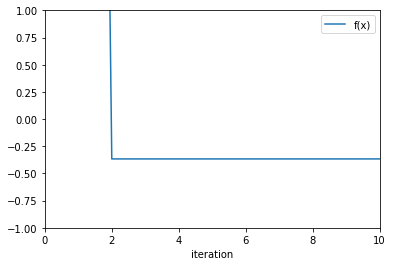

In [24]:
data.plot(y='f(x)', use_index=True,ylim=(-1,1))

x seems to be converging to something around (1,1,0)

## Augmented Lagrangian Method

In [26]:
# feasibility penalization function
p = lambda x: 1/2 * (h1(x)**2 + h2(x)**2)
# Merit function
L = lambda mu,lamb1,lamb2: lambda x: f(x) + lamb1*h1(x) + lamb2*h2(x) + mu*p(x)
JacL = lambda mu,lamb1,lamb2: lambda x: np.array([
    1 + lamb1 + 2*lamb2*x[0] + 4*x[0]**3 - 2*x[0] -2 + 2*x[1] + 2*x[2] + 8*x[0]*x[1]**2 + 4*x[0]*x[2]**2,
    1 + lamb1 + 4*lamb2*x[1] + 16*x[1]**3 - 6*x[1] -2 + 2*x[0] + 2*x[2] + 8*x[1]*x[0]**2 + 8*x[1]*x[2]**2,
    lamb1 + 2*lamb2*x[2] + 32*x[2]])

In [28]:
dataAug = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'L(x)','p(x)','h1(x)', 'h2(x)','mu','lambda1','lambda2']).set_index('iteration')
# initial condition
j=0 # iteration
w = [20,30,15]
mu = 5
lamb1 = 2
lamb2 = 2
dataAug.loc[j] = [w,f(w),normJacF(w),L(mu,lamb1,lamb2)(w),p(w),h1(w),h2(w),mu,lamb1,lamb2]
dataAug

,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
0,"[20, 30, 15]",50,36.055513,14704706.0,2939936.0,64,2424,5,2,2


In [38]:
# start optimization loop
# Run this cell again to get more iterates
j += 1 
res = newton(JacL(mu,lamb1,lamb2), w, maxiter=1000,disp=False)
w = res
dataAug.loc[j] = [w, f(w), normJacF(w), L(mu,lamb1,lamb2)(w), p(w), h1(w),h2(x), mu, lamb1,lamb2]
mu *= 2
lamb1 = lamb1 + mu * h1(w)
lamb2 = lamb2 + mu * h2(w)
dataAug

,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
0,"[20, 30, 15]",50,36.055513,1.470471e+07,2.939936e+06,64,2424,5,2,2
1,"[-0.2601186526673887, -0.12997540841760993, -0...",-0.390094,0.290784,2.157077e+00,1.445880e+00,-1.44565,1.20096,5,2,2
2,"[1.8113346138817807, 0.9054121405600845, 0.688...",2.71675,2.025020,6.768171e+01,1.254894e+01,2.4053,1.20096,10,-12.4565,-6.95465
3,"[-0.21256027240600742, -0.10628013619942613, -...",-0.31884,0.237650,-9.595215e+01,1.532659e+00,-1.50272,1.20096,20,35.6496,80.9371
4,"[0.2795722362014565, 0.1397861181203611, 0.200...",0.419358,0.312571,-1.110940e+01,4.272181e-01,-0.380158,1.20096,40,-24.4592,45.0005
5,"[1.5405145957773096, 0.7702572984152, -4.28369...",2.31077,1.722348,1.753926e+04,2.230288e+02,-2.97292,1.20096,80,-54.8718,-22.4047
6,"[0.07996225053696801, 0.03998112526771273, 0.0...",0.119943,0.089401,-2.716685e+03,8.047164e-01,-0.800615,1.20096,160,-530.539,3323.16
7,"[0.13090402426492304, 0.06545201213240873, 0.1...",0.196356,0.146355,-2.130668e+03,6.851362e-01,-0.673573,1.20096,320,-786.736,3008.25
8,"[0.25430881858726634, 0.12715440929363675, 0.2...",0.381463,0.284326,-1.296005e+03,4.191485e-01,-0.366037,1.20096,640,-1217.82,2395.53


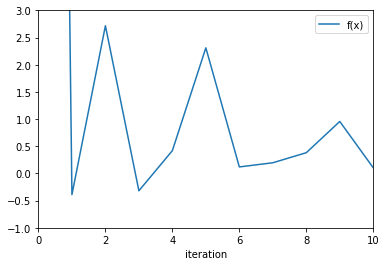

In [40]:
dataAug.plot(y='f(x)', use_index=True,ylim=(-1,3))